In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
# To update the plot cofigs.(W,H)

In [3]:
# Reading the data
df = pd.read_csv('movies.csv')
df.head(15)
df
#df.columns

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


### Data Cleaning

In [84]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [85]:
for col in df:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2f}%'.format(col, pct_missing))

name - 0.00%
rating - 0.01%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.28%
gross - 0.02%
company - 0.00%
runtime - 0.00%


In [4]:
# Deleting Null values from data
df.dropna(inplace = True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [91]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df[['budget','gross','votes','runtime']] = df[['budget','gross','votes','runtime']].astype('int64')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [7]:
df.sort_index(axis=1,inplace=True)

In [8]:
# sorting by highest gross
df = df.sort_values('gross',ascending=False)
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162,7.8,Sam Worthington,1100000,James Cameron,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181,8.4,Robert Downey Jr.,903000,Christopher Markus,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194,7.8,Leonardo DiCaprio,1100000,James Cameron,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138,7.8,Daisy Ridley,876000,Lawrence Kasdan,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149,8.4,Robert Downey Jr.,897000,Christopher Markus,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,Two Prong Lesson,United States,Francesca Gregorini,Drama,5073,Tanner Hall,R,"January 15, 2015 (Sweden)",96,5.8,Rooney Mara,3500,Tatiana von Fürstenberg,2009
2434,5000000,Trimark Pictures,United States,Stephen Cornwell,Action,2970,Philadelphia Experiment II,PG-13,"June 4, 1994 (South Korea)",97,4.5,Brad Johnson,1900,Wallace C. Bennett,1993
3681,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Ginger Snaps,Not Rated,"May 11, 2001 (Canada)",108,6.8,Emily Perkins,43000,Karen Walton,2000
272,800000,Embassy Pictures,United States,Charles Band,Horror,2270,Parasite,R,"March 12, 1982 (United States)",85,3.9,Robert Glaudini,2300,Alan J. Adler,1982


In [8]:
#pd.set_option('display.max_rows', None)
pd.reset_option('all')

C:\Users\Tejas\anaconda3\lib\site-packages\pandas\_config\config.py:653: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\pandas\_config\config.py:653: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [9]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

### Search for Correlation

In [10]:
df.corr()  # There is a High correlation b/w budget and gross

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


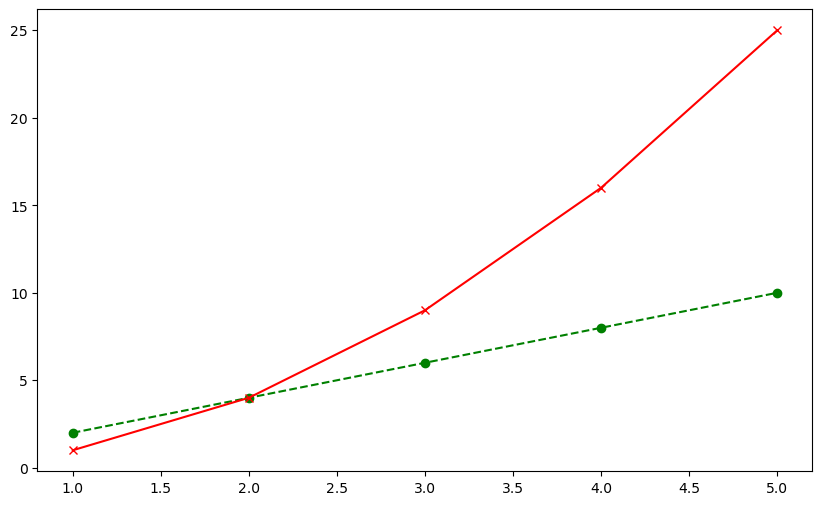

In [182]:
# Just an example of a line plot

x2 = [1, 2, 3, 4, 5]
y2 = [1, 4, 9, 16, 25]
plt.plot(x, y, color='green', linestyle='dashed', marker='o')
plt.plot(x2, y2, color='red', linestyle='solid', marker='x')

Text(0, 0.5, 'Gross in Billion')

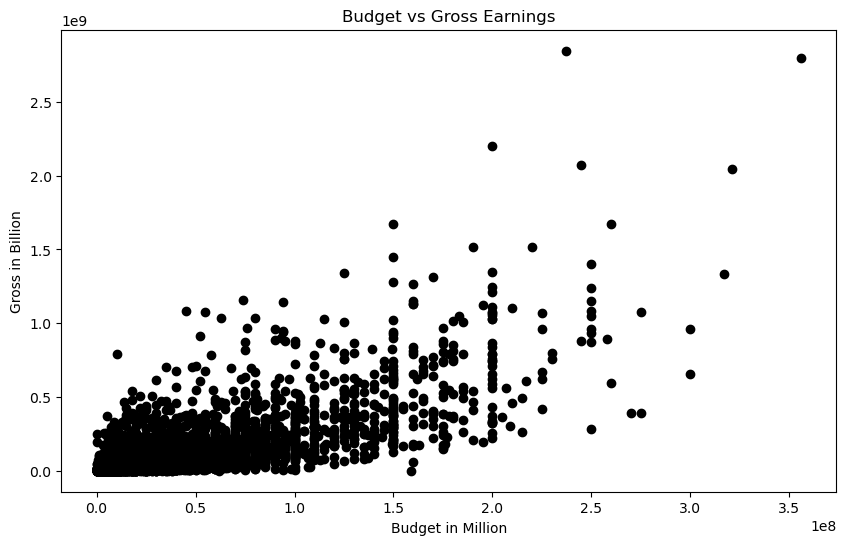

In [11]:
# Scatter plot on Budget vs Gross Earnings

plt.scatter(x=df['budget'], y=df['gross'], color='black')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget in Million')
plt.ylabel('Gross in Billion')

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [12]:
correlataion = df.corr(method='pearson') #pearson, kendall, spearman
correlataion

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


Text(95.72222222222221, 0.5, 'Movie Features')

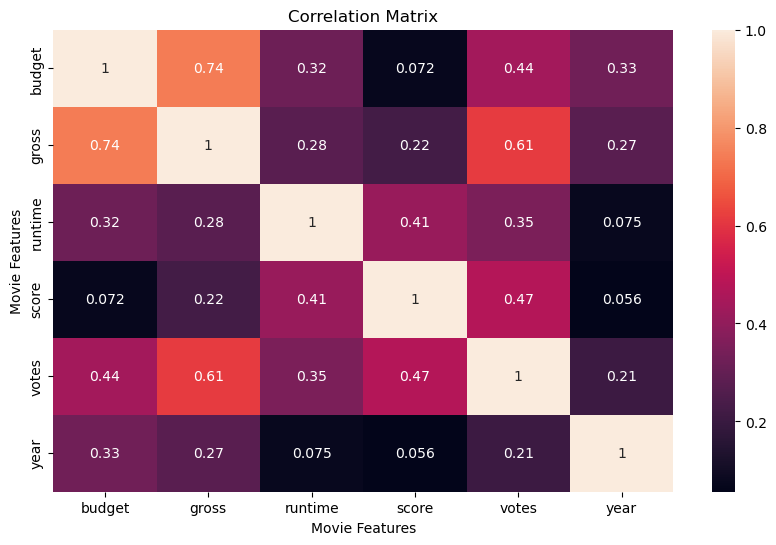

In [14]:
# Representing Correlation with a heatmap
import seaborn as sns
sns.heatmap(correlataion, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [15]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,1382,47,785,0,2847246203,386,5,527,162,7.8,1534,1100000,1263,2009
7445,356000000,983,47,105,0,2797501328,388,5,137,181,8.4,1470,903000,513,2019
3045,200000000,1382,47,785,6,2201647264,4909,5,534,194,7.8,1073,1100000,1263,1997
6663,245000000,945,47,768,0,2069521700,3643,5,529,138,7.8,356,876000,1806,2015
7244,321000000,983,47,105,0,2048359754,389,5,145,149,8.4,1470,897000,513,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,1385,47,585,6,5073,3794,6,890,96,5.8,1498,3500,2924,2009
2434,5000000,1376,47,1805,0,2970,2969,5,1467,97,4.5,186,1900,3102,1993
3681,5000000,466,6,952,6,2554,1595,3,1721,108,6.8,527,43000,1683,2000
272,800000,582,47,261,9,2270,2909,6,1525,85,3.9,1473,2300,55,1982


Text(95.72222222222221, 0.5, 'Movie Features')

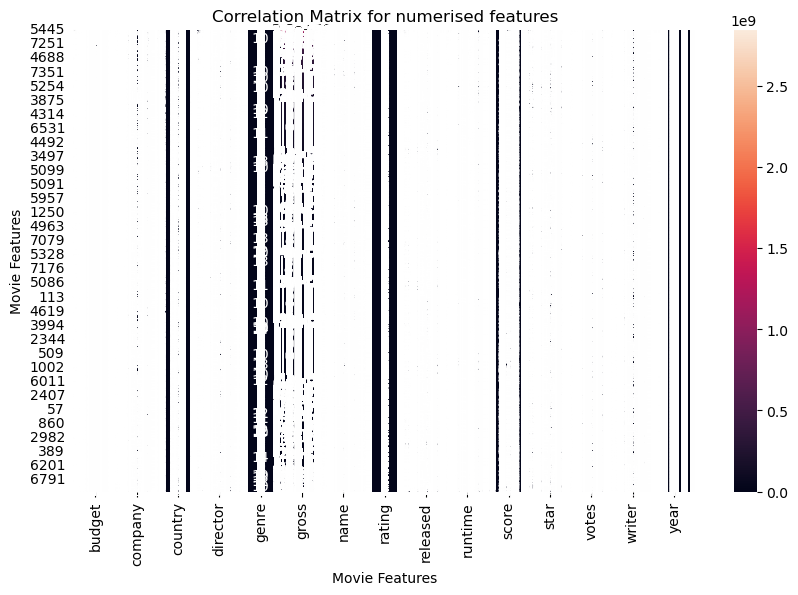

In [32]:
sns.heatmap(df_numerized, annot=True)
plt.title('Correlation Matrix for numerised features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# Tried to visualize the whole df_numerized, but it wasn't able to process the data.

In [16]:
num_cor = df_numerized.corr()
num_cor

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.170235,0.052977,-0.009662,-0.368523,0.740247,0.023392,-0.203946,0.019952,0.318695,0.072001,-0.021473,0.439675,-0.039466,0.327722
company,0.170235,1.000000,0.048569,-0.008223,-0.071334,0.149553,0.021697,-0.092357,-0.002407,0.037585,0.020656,0.014082,0.118470,-0.003697,-0.014333
country,0.052977,0.048569,1.000000,0.011133,-0.009164,0.060078,-0.025490,0.008230,-0.017228,-0.034477,-0.043051,-0.009990,0.041551,0.022488,-0.066748
director,-0.009662,-0.008223,0.011133,1.000000,-0.008553,-0.029560,0.015246,0.014656,0.002308,0.017433,0.005413,0.036593,-0.010376,0.261735,-0.038354
genre,-0.368523,-0.071334,-0.009164,-0.008553,1.000000,-0.244101,0.010996,0.147796,0.022142,-0.059237,0.035106,0.003341,-0.135990,0.017578,-0.073167
gross,0.740247,0.149553,0.060078,-0.029560,-0.244101,1.000000,0.005639,-0.181906,0.008501,0.275796,0.222556,-0.000004,0.614751,-0.035885,0.274321
name,0.023392,0.021697,-0.025490,0.015246,0.010996,0.005639,1.000000,-0.029234,-0.006152,0.010850,0.014450,-0.006882,0.012615,0.012880,0.025542
rating,-0.203946,-0.092357,0.008230,0.014656,0.147796,-0.181906,-0.029234,1.000000,0.018083,0.140792,0.065983,0.009196,0.006031,-0.003149,0.019499
released,0.019952,-0.002407,-0.017228,0.002308,0.022142,0.008501,-0.006152,0.018083,1.000000,0.008975,0.045874,0.015706,0.028833,0.008072,-0.001740
runtime,0.318695,0.037585,-0.034477,0.017433,-0.059237,0.275796,0.010850,0.140792,0.008975,1.000000,0.414068,0.010108,0.352303,-0.017561,0.075077


In [17]:
num_cor.unstack().head(45)
#df.info()

budget   budget      1.000000
         company     0.170235
         country     0.052977
         director   -0.009662
         genre      -0.368523
         gross       0.740247
         name        0.023392
         rating     -0.203946
         released    0.019952
         runtime     0.318695
         score       0.072001
         star       -0.021473
         votes       0.439675
         writer     -0.039466
         year        0.327722
company  budget      0.170235
         company     1.000000
         country     0.048569
         director   -0.008223
         genre      -0.071334
         gross       0.149553
         name        0.021697
         rating     -0.092357
         released   -0.002407
         runtime     0.037585
         score       0.020656
         star        0.014082
         votes       0.118470
         writer     -0.003697
         year       -0.014333
country  budget      0.052977
         company     0.048569
         country     1.000000
         d

In [18]:
high_corr = num_cor.unstack().sort_values()
high_corr

genre     budget     -0.368523
budget    genre      -0.368523
genre     gross      -0.244101
gross     genre      -0.244101
rating    budget     -0.203946
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64

In [19]:
high_corr[high_corr>0.5]

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
          budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

# Highly correlated features with Total Gross Earnings
* Budget (Higher the Budget, higher the Gross)
* Votes (Higher the number of votes, higher the Gross)

In [21]:
# Verifying obtained data by Visualizations:

<AxesSubplot:xlabel='budget', ylabel='gross'>

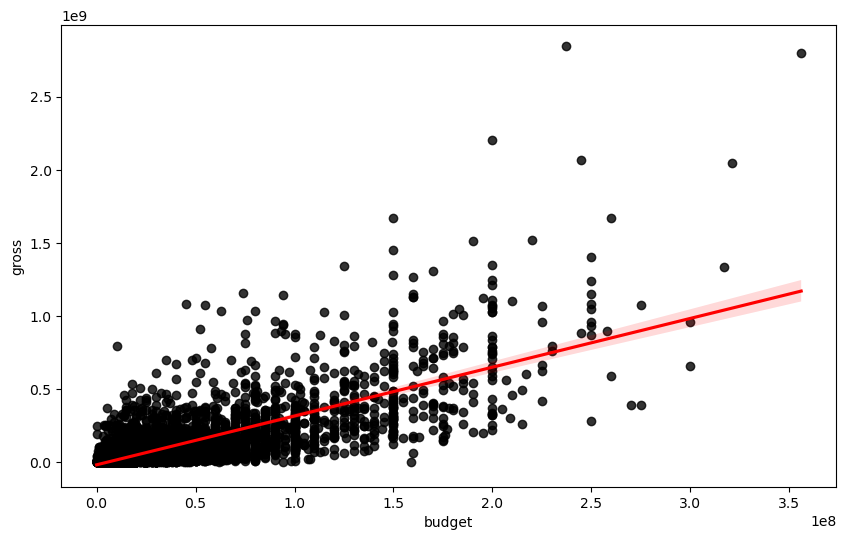

In [21]:
# Using Seaborn to create a Regresssion plot

sns.regplot(x=df['budget'],y=df['gross'], scatter_kws={'color':'black'}, line_kws={'color':'red'})

# Regresssion line indicates a linear relationship between two variables.

Text(0, 0.5, 'Gross')

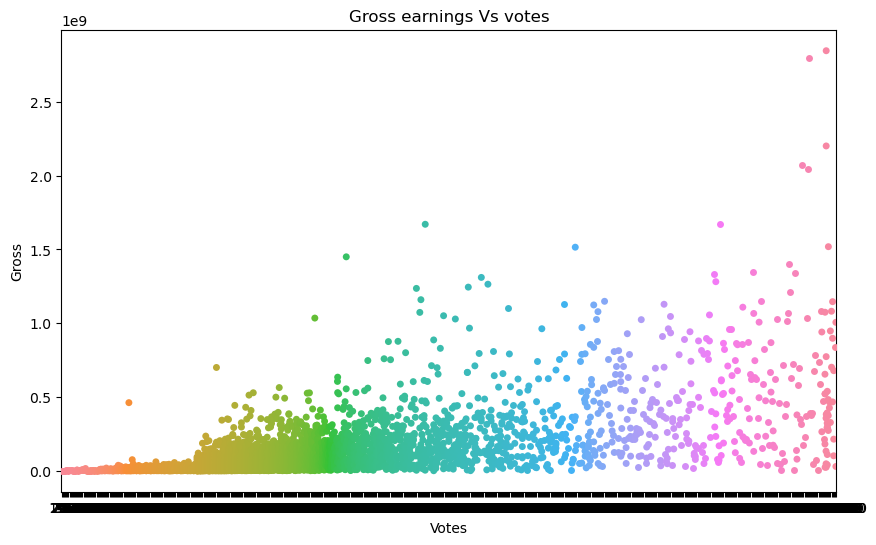

In [23]:
sns.stripplot(x = df['votes'],y = df['gross'])
plt.title('Gross earnings Vs votes')
plt.xlabel('Votes')
plt.ylabel('Gross')

# Seems to be correlated as expected.

In [37]:
# Top 15 Companies by Gross revenue

cmp_grs = df.groupby('company')[['gross']].sum()

cmp_grs_sort = cmp_grs.sort_values('gross',ascending =False)[:15]

cmp_grs_sort

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


Text(0, 0.5, 'Gross')

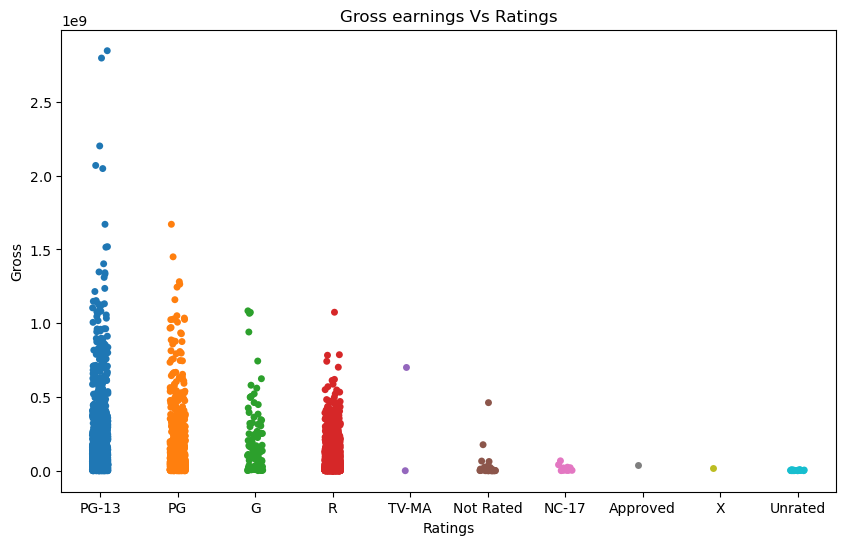

In [20]:
sns.stripplot(x = df['rating'],y = df['gross'])
plt.title('Gross earnings Vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('Gross')

# PG-13 rated movies seem to be more lucrative compared to others